# importing and preprocessing data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
import plotly.graph_objects as go

In [ ]:
url = 'https://drive.google.com/file/d/1m83tbIIf_4nrfu1uHG9VT58d2wHdQxRP/view?usp=sharing'
file_id = url.split('/')[-2]
dwn_url = 'https://drive.google.com/uc?id='+file_id
df = pd.read_csv(dwn_url)
df['datetime'] = pd.to_datetime(df['datetime'])

In [ ]:
def plot_candlestick(df):
    fig = go.Figure(data=[go.Candlestick(x=df['datetime'],
                    open=df['open'],
                    high=df['high'],
                    low=df['low'],
                    close=df['close'])])

    fig.update_layout(title='BTC Candlestick Chart',
                    xaxis_title='Date',
                    yaxis_title='BTC Price (USD)')

    fig.show()

In [ ]:
plot_candlestick(df)

In [ ]:
df.head(25)

,datetime,open,high,low,close,volume
0,2018-01-01 05:30:00,13715.65,13715.65,13155.38,13410.03,1676.204807
1,2018-01-01 09:30:00,13434.98,13818.55,13322.15,13570.35,1302.214836
2,2018-01-01 13:30:00,13569.98,13735.24,13001.13,13220.56,1319.755931
3,2018-01-01 17:30:00,13220.56,13330.00,12750.00,13247.00,1831.933153
4,2018-01-01 21:30:00,13247.00,13290.65,12940.00,13240.37,1092.337234
5,2018-01-02 01:30:00,13222.03,13599.70,13222.03,13380.00,1387.469883
6,2018-01-02 05:30:00,13382.16,13850.00,13231.96,13353.78,2365.532926
7,2018-01-02 09:30:00,13353.78,13480.84,12890.02,13343.00,2980.316053
8,2018-01-02 13:30:00,13343.01,13617.28,13302.59,13490.00,2596.182674
9,2018-01-02 17:30:00,13490.00,13894.86,13450.46,13690.03,3365.879508


In [ ]:
dfl = df[['datetime', 'low', 'close']]
dfh = df[['datetime', 'high', 'close']]

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [ ]:
def robust_scale_dataframe(input_df):
    numerical_columns = input_df.select_dtypes(include=['number']).columns.tolist()


    # Apply scaling to each numerical column
    for column in numerical_columns:
        # Calculate quartiles for the current column
        Q1 = input_df[column].quantile(0.25)
        Q3 = input_df[column].quantile(0.75)

        # Create a new scaled column
        #scaled_column_name = f"{column}"
        input_df[column] = (input_df[column] - Q1) / (Q3 - Q1)

    return input_df

In [ ]:
dfl = robust_scale_dataframe(dfl)
dfh = robust_scale_dataframe(dfh)

<ipython-input-8-05117178d7f3>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-8-05117178d7f3>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-8-05117178d7f3>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-8-05117178

In [ ]:
def create_modified_df(dfx, column_name):
    n = 25
    modified_df = pd.DataFrame()
    modified_df[['datetime', 'close']] = dfx[['datetime', 'close']]
    for i in range(n, 0, -1):
        modified_df[f'{column_name}-target'] = dfx[column_name]
        modified_df[f'{column_name}-{i}'] = dfx[column_name].shift(i)
    modified_df
    modified_df = modified_df.dropna()

    column_to_exclude = 'datetime'
    columns_to_scale = [col for col in modified_df.columns if col != column_to_exclude]


    modified_df[columns_to_scale] = scaler.fit_transform(modified_df[columns_to_scale])

    return modified_df

In [ ]:
m_dfl = create_modified_df(dfl, 'low')
m_dfh = create_modified_df(dfh, 'high')

In [ ]:
m_dfh['close']

25      0.210577
26      0.256181
27      0.256065
28      0.275751
29      0.290064
          ...   
8926    1.114043
8927    1.108981
8928    1.090758
8929    1.105150
8930    1.071797
Name: close, Length: 8906, dtype: float64

In [ ]:
df_low1 = m_dfl[ m_dfl['low-target'] < 0.6]
df_low2 = m_dfl[ m_dfl['low-target'] >= 0.6]



In [ ]:
df_high1 = m_dfh[ m_dfh['high-target'] < 0.6]
df_high2 = m_dfh[ m_dfh['high-target'] >= 0.6]

In [ ]:
df_low2.head()

,datetime,close,low-target,low-25,low-24,low-23,low-22,low-21,low-20,low-19,...,low-10,low-9,low-8,low-7,low-6,low-5,low-4,low-3,low-2,low-1
6525,2020-12-26 09:30:00,0.594886,0.605458,0.525479,0.527648,0.521462,0.549984,0.555681,0.557456,0.568296,...,0.543744,0.547176,0.552291,0.558576,0.558788,0.564501,0.571563,0.579346,0.587684,0.599520
6526,2020-12-26 13:30:00,0.596830,0.601880,0.528351,0.521736,0.550022,0.556529,0.557827,0.568480,0.558939,...,0.547572,0.553183,0.559283,0.559301,0.564689,0.571883,0.579584,0.587752,0.599666,0.605583
6527,2020-12-26 17:30:00,0.627827,0.608732,0.522432,0.550311,0.556567,0.558677,0.568859,0.559120,0.538473,...,0.553584,0.560187,0.560009,0.565206,0.572074,0.579908,0.587994,0.599735,0.605730,0.602004
6528,2020-12-26 21:30:00,0.639555,0.642113,0.551045,0.556860,0.558716,0.569726,0.559493,0.538647,0.543337,...,0.560593,0.560914,0.565922,0.572598,0.580102,0.588323,0.599982,0.605800,0.602151,0.608858
6529,2020-12-27 01:30:00,0.661465,0.651473,0.557603,0.559010,0.569766,0.560346,0.539006,0.543513,0.560181,...,0.561320,0.566836,0.573323,0.580633,0.588519,0.600318,0.606049,0.602220,0.609006,0.642245


#splitting for training


In [ ]:
#due to extreme fluctuations and variability like extreme rise or drop in prices, the data was divided into two portions, by analyzing the data's graphs.

In [ ]:
y_low1= (df_low1['low-target']).to_numpy()
x_low1 = df_low1.drop(columns = ['datetime','low-target','close']).to_numpy()

y_low2= (df_low2['low-target']).to_numpy()
x_low2 = df_low2.drop(columns = ['datetime','low-target','close']).to_numpy()

In [ ]:
y_high1 = df_high1['high-target'].to_numpy()
x_high1 = df_high1.drop(columns = ['datetime','high-target']).to_numpy()

y_high2 = df_high2['high-target'].to_numpy()
x_high2 = df_high2.drop(columns = ['datetime','high-target']).to_numpy()

In [ ]:
def train_val_test(x,y, m_df):
    timestamps = m_df['datetime']

    q_80 = int(len(timestamps) * .8)
    q_90 = int(len(timestamps) * .9)

    dates_train, x_train, y_train = timestamps[:q_80], x[:q_80], y[:q_80]

    dates_val, x_val, y_val = timestamps[q_80:q_90], x[q_80:q_90], y[q_80:q_90]
    dates_test, x_test, y_test = timestamps[q_90:], x[q_90:], y[q_90:]

    return dates_train, x_train, y_train, dates_val, x_val, y_val, dates_test, x_test, y_test


In [ ]:
dates_train_l1, x_train_l1, y_train_l1, dates_val_l1, x_val_l1, y_val_l1, dates_test_l1, x_test_l1, y_test_l1 = train_val_test(x_low1, y_low1, df_low1)
dates_train_l2, x_train_l2, y_train_l2, dates_val_l2, x_val_l2, y_val_l2, dates_test_l2, x_test_l2, y_test_l2 = train_val_test(x_low2, y_low2, df_low2)

In [ ]:
dates_train_h1, x_train_h1, y_train_h1, dates_val_h1, x_val_h1, y_val_h1, dates_test_h1, x_test_h1, y_test_h1 = train_val_test(x_high1, y_high1, df_high1)
dates_train_h2, x_train_h2, y_train_h2, dates_val_h2, x_val_h2, y_val_h2, dates_test_h2, x_test_h2, y_test_h2 = train_val_test(x_high2, y_high2, df_high2)

# lstm model

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU, Bidirectional, LSTM
from keras import layers
from keras.optimizers import Adam
from keras.losses import Huber
from keras.metrics import RootMeanSquaredError

In [ ]:
def bi_lstm():
    model = Sequential([
        layers.Input((25, 1)),
        Bidirectional(LSTM(units=128, activation='relu', return_sequences=True)),
        Dropout(0.3),
        Bidirectional(LSTM(units=64, activation='relu', return_sequences=True)),
        Dropout(0.3),
        Bidirectional(LSTM(units=32, activation='relu', return_sequences=True)),
        Dropout(0.3),
        Bidirectional(LSTM(units=16, activation='relu')),
        Dropout(0.3),
        Dense(units=1, activation='linear')
    ])

    return model

In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12789728702932982767
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14626652160
locality {
  bus_id: 1
  links {
  }
}
incarnation: 4902668837641784143
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [ ]:
model_l1 = bi_lstm()
model_l1.summary()
model_l1.compile(loss=Huber(delta=2.0),
              optimizer=Adam(learning_rate=0.005),
              metrics=[RootMeanSquaredError()])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_8 (Bidirecti  (None, 25, 256)           133120    
 onal)                                                           
                                                                 
 dropout_8 (Dropout)         (None, 25, 256)           0         
                                                                 
 bidirectional_9 (Bidirecti  (None, 25, 128)           164352    
 onal)                                                           
                                                                 
 dropout_9 (Dropout)         (None, 25, 128)           0         
                                                                 
 bidirectional_10 (Bidirect  (None, 25, 64)            41216     
 ional)                                                          
                                                      

In [ ]:
history = model_l1.fit(x_train_l1, y_train_l1, validation_data=(x_val_l1, y_val_l1), epochs=20)

Epoch 1/20
163/163 [==============================] - 59s 291ms/step - loss: 7.6417e-04 - root_mean_squared_error: 0.0391 - val_loss: 9.4257e-05 - val_root_mean_squared_error: 0.0137
Epoch 2/20
163/163 [==============================] - 44s 268ms/step - loss: 4.7754e-04 - root_mean_squared_error: 0.0309 - val_loss: 4.0661e-04 - val_root_mean_squared_error: 0.0285
Epoch 3/20
163/163 [==============================] - 44s 267ms/step - loss: 3.7800e-04 - root_mean_squared_error: 0.0275 - val_loss: 4.0515e-04 - val_root_mean_squared_error: 0.0285
Epoch 4/20
163/163 [==============================] - 44s 271ms/step - loss: 3.7368e-04 - root_mean_squared_error: 0.0273 - val_loss: 3.7310e-04 - val_root_mean_squared_error: 0.0273
Epoch 5/20
163/163 [==============================] - 44s 267ms/step - loss: 3.5390e-04 - root_mean_squared_error: 0.0266 - val_loss: 9.2675e-05 - val_root_mean_squared_error: 0.0136
Epoch 6/20
163/163 [==============================] - 45s 276ms/step - loss: 3.2449e-

In [ ]:
model_l1.save('model_l1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



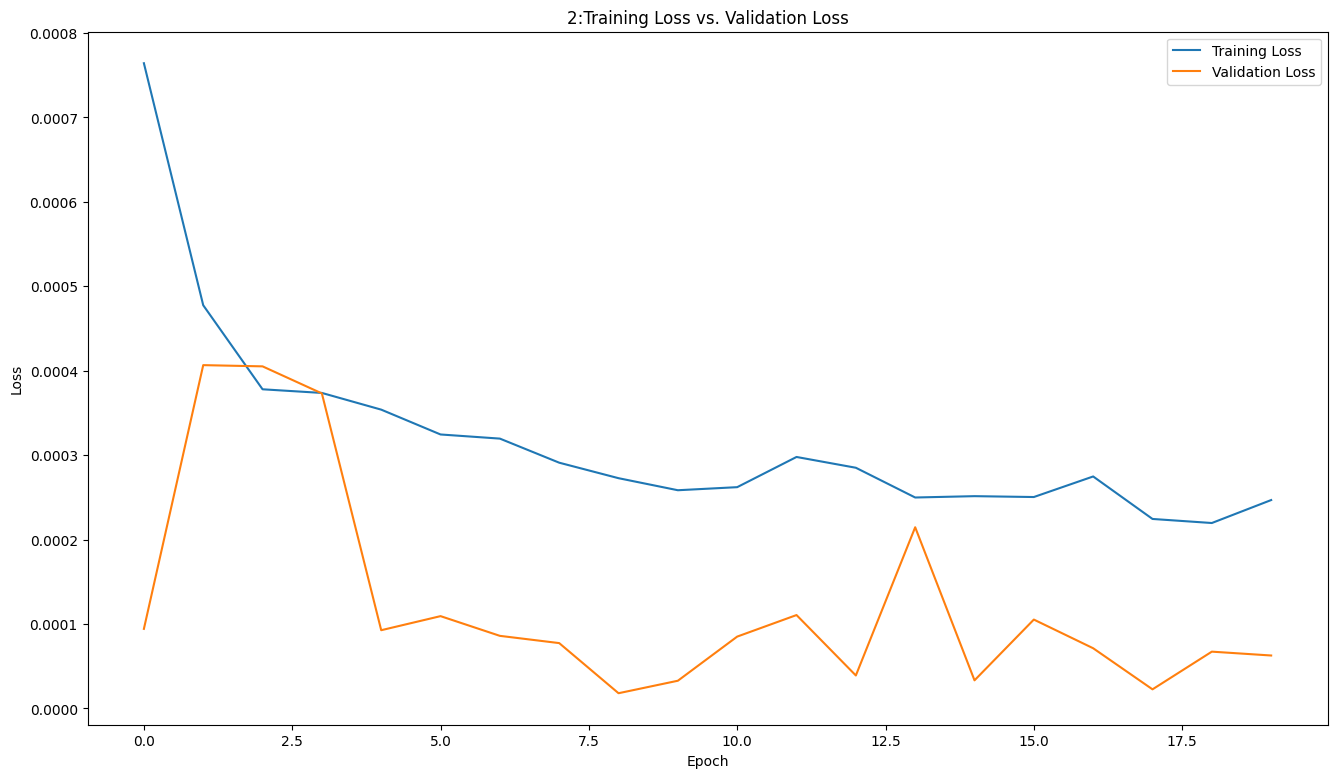

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('2:Training Loss vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()



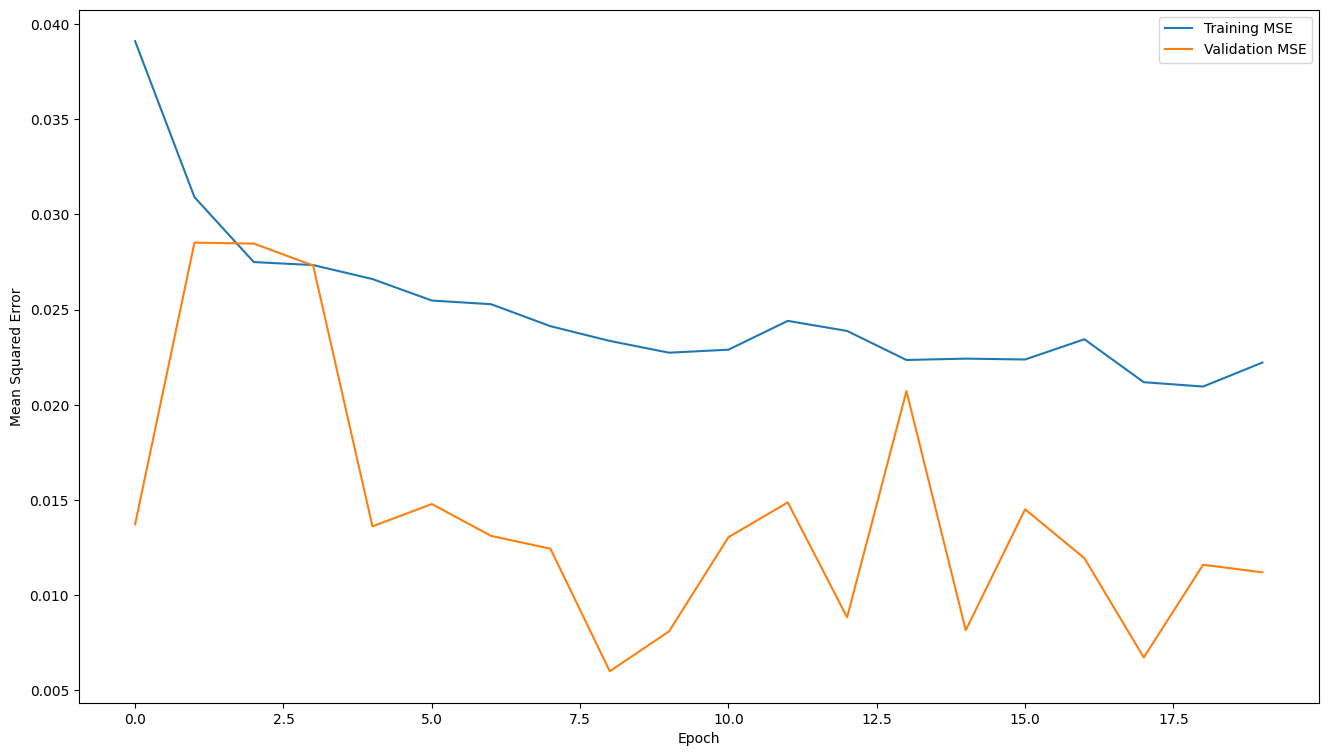

In [ ]:
plt.figure(figsize=(16, 9))

# plt.subplot(1, 2, 1)
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Training Loss vs. Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()

plt.plot(history.history['root_mean_squared_error'], label='Training MSE')
plt.plot(history.history['val_root_mean_squared_error'], label='Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


# plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
predictions = model_l1.predict(x_test_l1)
r2_score(y_test_l1, predictions)

NameError: name 'x_test_l1' is not defined

# checking out of sample data


In [ ]:
import yfinance as yf

ticker_symbol = "BTC-USD"

start_date = "2022-02-01"
end_date = "2022-12-31"

btc_data_1= yf.download(ticker_symbol, start=start_date, end=end_date, interval='1h')
btc_data_4h = btc_data_1.resample('4H').mean()

# Convert to DataFrame
df1 = pd.DataFrame(btc_data_4h)
df1 = df1.reset_index()
df1.columns = ['datetime', 'open', 'high', 'low', 'close', 'adj close', 'volume']
df1

In [ ]:
plot_candlestick(df1)

In [ ]:
dfol1 = df1[['datetime', 'low']]

In [ ]:
mdf1 = create_modified_df(dfol1, 'low')

dfo_low1 = mdf1[ mdf1['low-target'] < 0.6]
dfo_low2 = mdf1[ mdf1['low-target'] >= 0.6]

In [ ]:
mdf1.shape

In [ ]:
y1 = dfo_low1['low-target'].to_numpy()
x1 = dfo_low1.drop(columns = ['datetime','low-target']).to_numpy()

In [ ]:
pred1 = model_l1.predict(x1)
# mse = mean_squared_error(y1, pred1)


In [ ]:
x1.shape

In [ ]:
r2_score(y1, pred1)

#using the model to create strategy


In [ ]:
from keras.models import load_model
model_l1 = load_model('model_l1.h5')
model_l2 = load_model('model_l2.h5')
# model_h1 = load_model('model_h1.h5')
# model_h2 = load_model('model_h2.h5')

In [ ]:
pred_l1 = model_l1.predict(x_low1)
trade_l1 = pd.DataFrame()
df_low1['low_predictions'] = pred_l1

pred_l2 = model_l2.predict(x_low2)
trade_l2 = pd.DataFrame()
df_low2['low_predictions'] = pred_l2


204/204 [==============================] - 14s 67ms/step


<ipython-input-35-1af57331d843>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



76/76 [==============================] - 5s 40ms/step


<ipython-input-35-1af57331d843>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
low= pd.concat([df_low1, df_low2 ], axis=0, ignore_index=True)

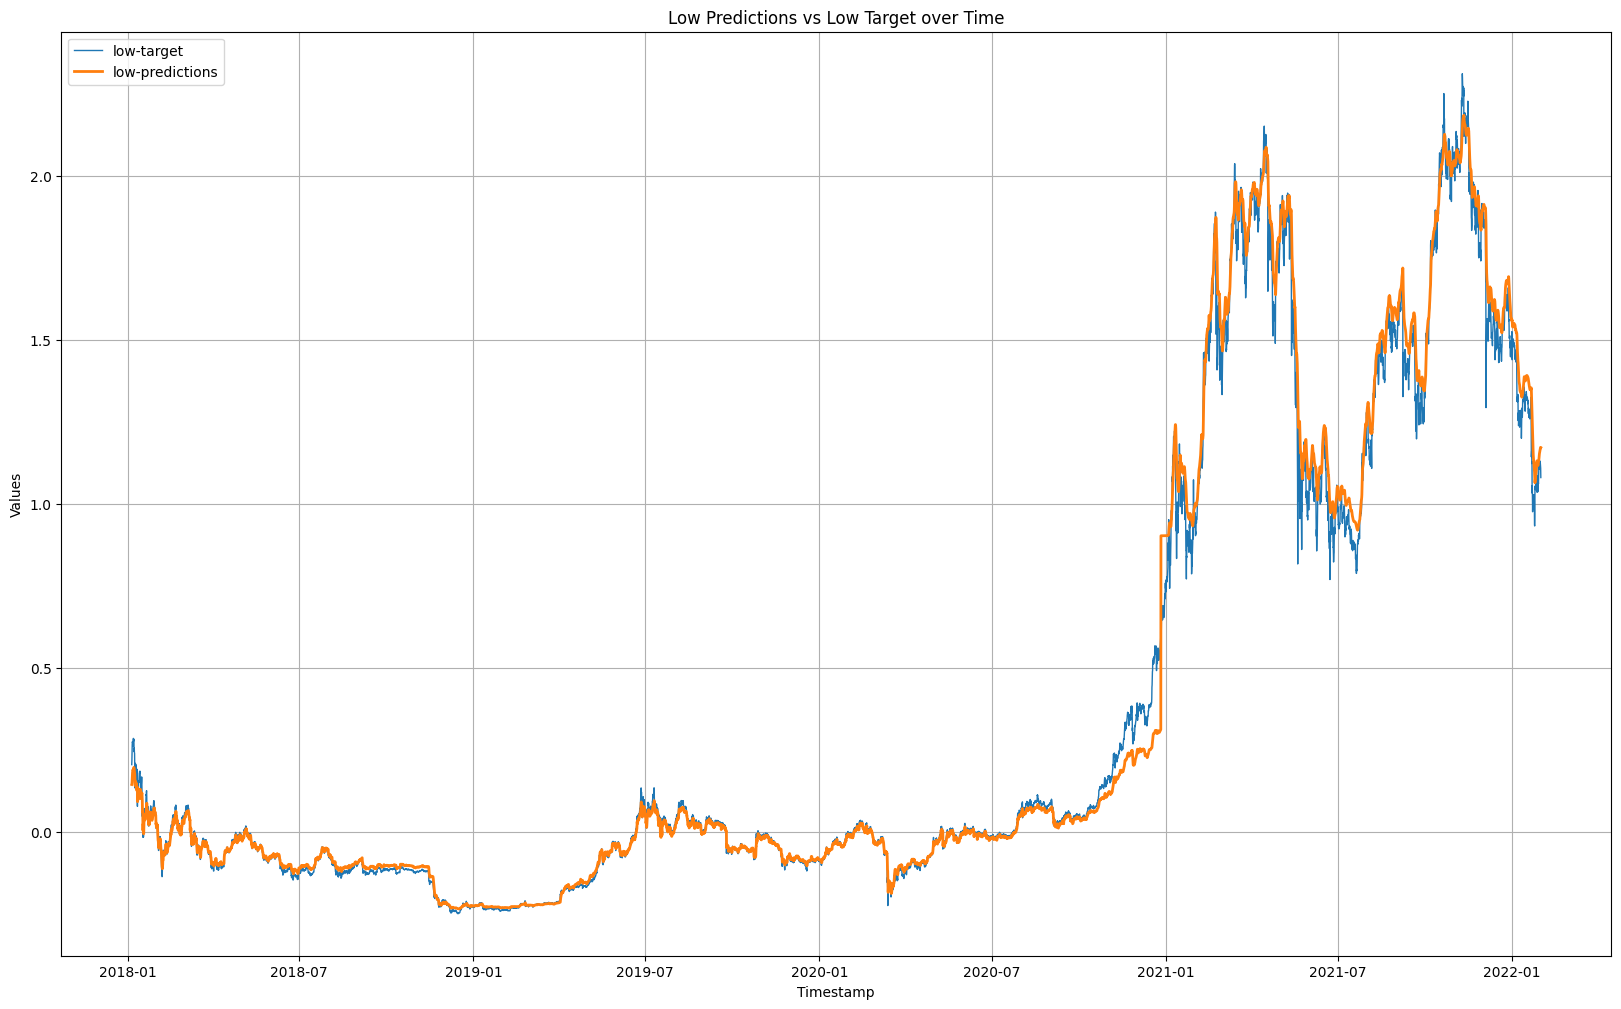

In [ ]:
plt.figure(figsize=(20, 12))


plt.plot(low['datetime'], low['low-target'], label='low-target', linewidth = 1)
plt.plot(low['datetime'], low['low_predictions'], label='low-predictions', linewidth = 2)

plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.title('Low Predictions vs Low Target over Time')
plt.legend()
plt.grid(True)

plt.savefig('lstm_pred.png')
plt.show()

In [ ]:
n = 6
# first_column = low.iloc[:, 0]
last_n_columns = low.iloc[:, -n:]

# Combine the extracted columns into a new DataFrame
low_pred = pd.DataFrame()
low_pred = pd.concat([low[['datetime','low-target', 'close']], last_n_columns], axis=1)

In [ ]:
low_pred

,datetime,low-target,close,low-5,low-4,low-3,low-2,low-1,low_predictions
0,2018-01-05 09:30:00,0.206011,0.210577,0.179188,0.189582,0.191736,0.206144,0.207723,0.145409
1,2018-01-05 13:30:00,0.217138,0.256181,0.189688,0.191815,0.206168,0.207774,0.206054,0.147157
2,2018-01-05 17:30:00,0.251708,0.256065,0.191922,0.206252,0.207798,0.206104,0.217182,0.150989
3,2018-01-05 21:30:00,0.265128,0.275751,0.206368,0.207883,0.206128,0.217235,0.251760,0.162315
4,2018-01-06 01:30:00,0.275668,0.290064,0.208000,0.206213,0.217260,0.251821,0.265182,0.173034
...,...,...,...,...,...,...,...,...,...
8901,2022-01-30 13:30:00,1.127685,1.114043,1.108463,1.109789,1.129166,1.125906,1.132137,1.168925
8902,2022-01-30 17:30:00,1.124389,1.108981,1.110410,1.129630,1.126036,1.132412,1.127917,1.171515
8903,2022-01-30 21:30:00,1.113679,1.090758,1.130262,1.126499,1.132544,1.128192,1.124621,1.173356
8904,2022-01-31 01:30:00,1.110068,1.105150,1.127130,1.133009,1.128322,1.124894,1.113908,1.173524


In [ ]:
def create_final_df(dfx, column_name):
    n = 5

    final_df = pd.DataFrame()

    for i in range(1, n+1):
        final_df[f'{column_name}+{i}'] = dfx[column_name].shift(-i)

    final_df = pd.concat([dfx, final_df], axis=1)


    return final_df

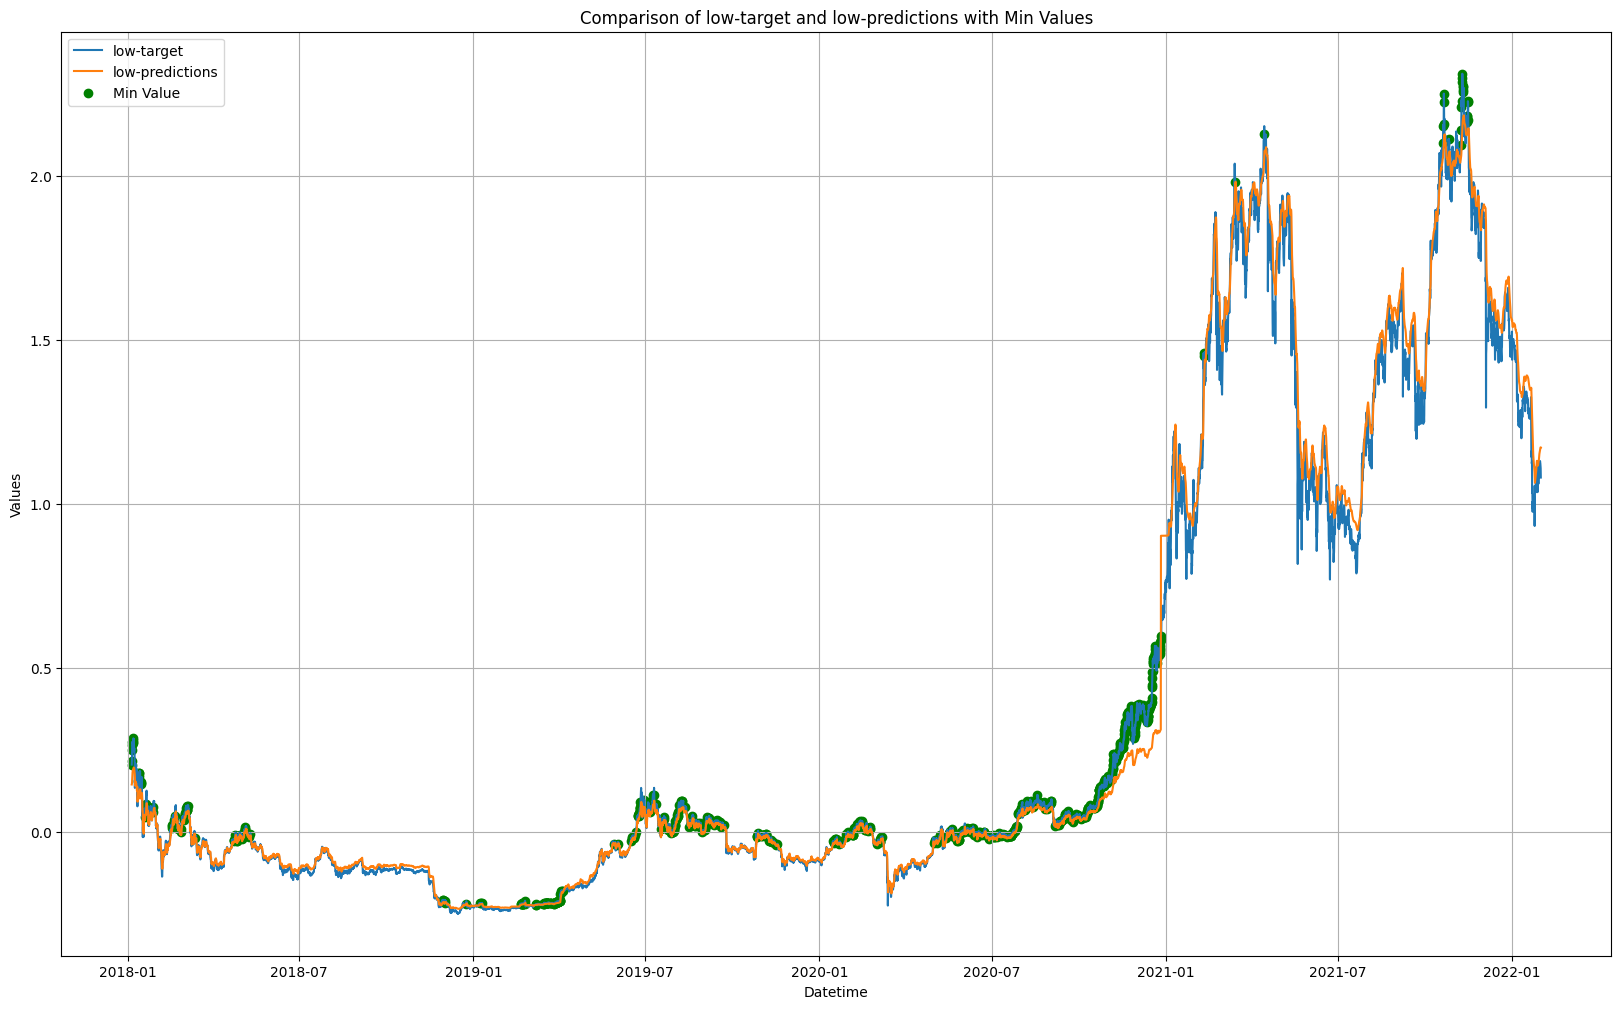

In [ ]:
plt.figure(figsize=(20, 12))

min_values = low_predx[low_predx['is_min'] == 1]

plt.plot(low_predx['datetime'], low_predx['low-target'], label='low-target')
plt.plot(low_predx['datetime'], low_predx['low_predictions'], label='low-predictions')
plt.scatter(min_values['datetime'], min_values['low-target'], color='green', label='Min Value')

plt.xlabel('Datetime')
plt.ylabel('Values')
plt.title('Comparison of low-target and low-predictions with Min Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
low_predx = create_final_df(low_pred, 'low_predictions')
low_predx


,datetime,low-target,close,low-5,low-4,low-3,low-2,low-1,low_predictions,low_predictions+1,low_predictions+2,low_predictions+3,low_predictions+4,low_predictions+5
0,2018-01-05 09:30:00,0.206011,0.210577,0.179188,0.189582,0.191736,0.206144,0.207723,0.145409,0.147157,0.150989,0.162315,0.173034,0.181819
1,2018-01-05 13:30:00,0.217138,0.256181,0.189688,0.191815,0.206168,0.207774,0.206054,0.147157,0.150989,0.162315,0.173034,0.181819,0.186401
2,2018-01-05 17:30:00,0.251708,0.256065,0.191922,0.206252,0.207798,0.206104,0.217182,0.150989,0.162315,0.173034,0.181819,0.186401,0.188885
3,2018-01-05 21:30:00,0.265128,0.275751,0.206368,0.207883,0.206128,0.217235,0.251760,0.162315,0.173034,0.181819,0.186401,0.188885,0.190450
4,2018-01-06 01:30:00,0.275668,0.290064,0.208000,0.206213,0.217260,0.251821,0.265182,0.173034,0.181819,0.186401,0.188885,0.190450,0.188665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8901,2022-01-30 13:30:00,1.127685,1.114043,1.108463,1.109789,1.129166,1.125906,1.132137,1.168925,1.171515,1.173356,1.173524,1.173155,NaN
8902,2022-01-30 17:30:00,1.124389,1.108981,1.110410,1.129630,1.126036,1.132412,1.127917,1.171515,1.173356,1.173524,1.173155,NaN,NaN
8903,2022-01-30 21:30:00,1.113679,1.090758,1.130262,1.126499,1.132544,1.128192,1.124621,1.173356,1.173524,1.173155,NaN,NaN,NaN
8904,2022-01-31 01:30:00,1.110068,1.105150,1.127130,1.133009,1.128322,1.124894,1.113908,1.173524,1.173155,NaN,NaN,NaN,NaN


In [ ]:
signals_df

In [ ]:
low_predx['is_min'] = np.where(low_predx['low_predictions'] == low_predx.min(axis=1), 1, 0)

<ipython-input-43-4b06ecfb2b3d>:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [ ]:
low_predx['is_min'].values.sum()

904

In [ ]:
low_predx

In [ ]:
low_predx.columns

In [ ]:
modified_data = pd.DataFrame(columns = low_predx.columns)
#1 is the signal for buy
#0 before the next 1 is the signal to exit from the current position
for i in range(1,len(low_predx)):
    if low_predx['is_min'][i]==1:
        modified_data.loc[len(modified_data)] = low_predx.iloc[i-1,:]
        modified_data.loc[len(modified_data)] = low_predx.iloc[i,:]
modified_data = (modified_data.loc[modified_data.index != 0]).reset_index(drop=True)
modified_data


,datetime,low-target,close,low-5,low-4,low-3,low-2,low-1,low_predictions,low_predictions+1,low_predictions+2,low_predictions+3,low_predictions+4,low_predictions+5,is_min
0,2018-01-05 13:30:00,0.217138,0.256181,0.189688,0.191815,0.206168,0.207774,0.206054,0.147157,0.150989,0.162315,0.173034,0.181819,0.186401,1
1,2018-01-05 13:30:00,0.217138,0.256181,0.189688,0.191815,0.206168,0.207774,0.206054,0.147157,0.150989,0.162315,0.173034,0.181819,0.186401,1
2,2018-01-05 17:30:00,0.251708,0.256065,0.191922,0.206252,0.207798,0.206104,0.217182,0.150989,0.162315,0.173034,0.181819,0.186401,0.188885,1
3,2018-01-05 17:30:00,0.251708,0.256065,0.191922,0.206252,0.207798,0.206104,0.217182,0.150989,0.162315,0.173034,0.181819,0.186401,0.188885,1
4,2018-01-05 21:30:00,0.265128,0.275751,0.206368,0.207883,0.206128,0.217235,0.25176,0.162315,0.173034,0.181819,0.186401,0.188885,0.19045,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1800,2021-11-15 01:30:00,2.170572,2.181886,2.18742,2.186991,2.172416,2.169938,2.15257,2.131021,2.131176,2.137047,2.142754,2.146886,2.145411,1
1801,2021-11-15 01:30:00,2.170572,2.181886,2.18742,2.186991,2.172416,2.169938,2.15257,2.131021,2.131176,2.137047,2.142754,2.146886,2.145411,1
1802,2021-11-15 05:30:00,2.229327,2.189427,2.188216,2.173309,2.17019,2.153093,2.171019,2.131176,2.137047,2.142754,2.146886,2.145411,2.141928,1
1803,2021-11-15 05:30:00,2.229327,2.189427,2.188216,2.173309,2.17019,2.153093,2.171019,2.131176,2.137047,2.142754,2.146886,2.145411,2.141928,1


In [ ]:
len(modified_data)

1805

In [ ]:
signals_df = pd.DataFrame(columns = modified_data.columns)
signals_df.loc[len(signals_df)] = modified_data.iloc[0,:]
for i in range(1,len(modified_data)-1):
    if modified_data['is_min'][i]==0:
        signals_df.loc[len(signals_df)] = modified_data.iloc[i,:]
        signals_df.loc[len(signals_df)] = modified_data.iloc[i+1,:]
signals_df


,datetime,low-target,close,low-5,low-4,low-3,low-2,low-1,low_predictions,low_predictions+1,low_predictions+2,low_predictions+3,low_predictions+4,low_predictions+5,is_min
0,2018-01-05 13:30:00,0.217138,0.256181,0.189688,0.191815,0.206168,0.207774,0.206054,0.147157,0.150989,0.162315,0.173034,0.181819,0.186401,1
1,2018-01-06 17:30:00,0.262087,0.274317,0.265535,0.275938,0.27324,0.273685,0.275209,0.19045,0.188665,0.190994,0.194438,0.196589,0.19621,0
2,2018-01-06 21:30:00,0.281579,0.282647,0.276092,0.273352,0.273717,0.275275,0.262141,0.188665,0.190994,0.194438,0.196589,0.19621,0.196631,1
3,2018-01-12 05:30:00,0.122566,0.168885,0.078978,0.144204,0.153732,0.150671,0.123029,0.105473,0.10058,0.10822,0.112069,0.114257,0.113255,0
4,2018-01-12 09:30:00,0.156505,0.163899,0.144285,0.153795,0.150688,0.123058,0.122591,0.10058,0.10822,0.112069,0.114257,0.113255,0.115744,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,2021-11-09 01:30:00,2.228568,2.260067,2.143388,2.212875,2.233803,2.214542,2.238691,2.122442,2.130654,2.142915,2.156069,2.166358,2.172118,1
691,2021-11-13 21:30:00,2.16217,2.12043,2.160549,2.154221,2.150708,2.144505,2.146671,2.125154,2.125601,2.126476,2.129139,2.131694,2.132522,0
692,2021-11-14 01:30:00,2.165741,2.137508,2.155427,2.151592,2.144753,2.147194,2.162615,2.125601,2.126476,2.129139,2.131694,2.132522,2.132719,1
693,2021-11-14 21:30:00,2.152127,2.129326,2.169069,2.186196,2.186093,2.172164,2.16941,2.132719,2.131021,2.131176,2.137047,2.142754,2.146886,0


In [ ]:
signals_df = signals_df.iloc[0:len(signals_df)-1,:]


In [ ]:
columns_to_drop = ['low-5', 'low-4', 'low-3', 'low-2', 'low-1', 'low_predictions+1', 'low_predictions+2', 'low_predictions+3', 'low_predictions+4','low_predictions+5']
signals_df.drop(columns=columns_to_drop, inplace=True)

<ipython-input-52-760b52d0b7ee>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



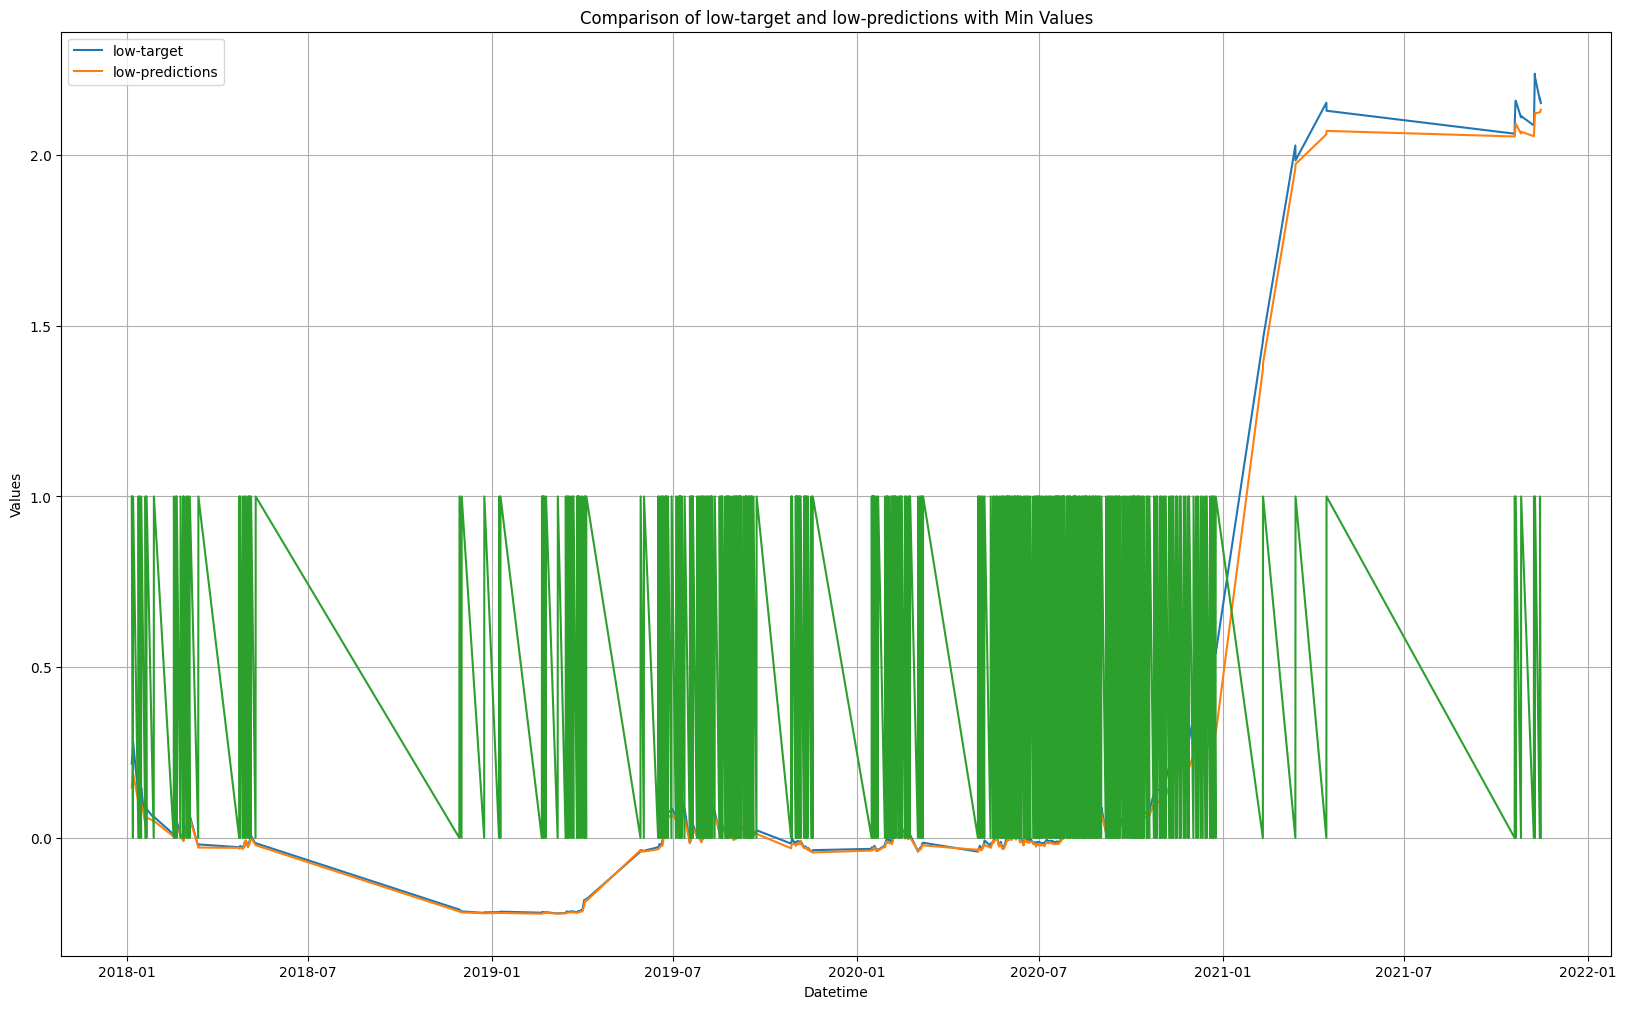

In [ ]:
signals_df

In [ ]:
q3_close

In [ ]:
for index, row in signals_df.iterrows():
    signals_df.at[index, 'close'] = row['close'] * (q3_close - q1_close) + q1_close


In [ ]:
signals_df['close']

# backtesting and metrics


In [ ]:
initial=100000
signals_df["No of BTC"] = initial/signals_df['close']

<ipython-input-347-f8f761c318d0>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
PNL = [] # PNL Calculation
commission = 0.0015
df1 = signals_df.copy()
for i in range(0,len(df1)-1):
  if df1['is_min'][i] == 1.0:
    money = ((df1['close'][i+1] - df1['close'][i]) * df1["No of BTC"][i])*commission
  else:
    money = 0
  PNL.append(money)
PNL.append(0)
df1['PNL']=PNL

In [ ]:
# initial=100000
Money=[]
for i in range(0,len(df1)):
  current=df1['PNL'][i] + initial
  initial=current
  Money.append(initial)

df1['Money']=Money
df1.head(10)

,datetime,low-target,close,low_predictions,is_min,No of BTC,PNL,Money
0,2018-01-05 13:30:00,0.217138,13687.026798,0.142991,1,7.306189,5.084225,100005.084225
1,2018-01-06 17:30:00,0.262087,14150.946295,0.186424,0,7.066665,0.000000,100005.084225
2,2018-01-06 21:30:00,0.281579,14363.996687,0.184693,1,6.961851,-30.387520,99974.696705
3,2018-01-12 05:30:00,0.122566,11454.088477,0.102044,0,8.730507,0.000000,99974.696705
4,2018-01-12 09:30:00,0.156505,11326.571155,0.097207,1,8.828797,-0.066515,99974.630191
5,2018-01-12 21:30:00,0.151255,11321.548591,0.110546,0,8.832714,0.000000,99974.630191
6,2018-01-13 01:30:00,0.162699,11344.478988,0.109605,1,8.814861,-8.314534,99966.315657
7,2018-01-14 21:30:00,0.130116,10715.651971,0.102366,0,9.332143,0.000000,99966.315657
8,2018-01-15 01:30:00,0.146408,11080.375826,0.098818,1,9.024965,-35.675524,99930.640133
9,2018-01-19 05:30:00,0.037531,8445.054384,0.042658,0,11.84125,0.000000,99930.640133


In [ ]:
df1["exit"] = df1["close"].shift(-1)
df1.head(10)

,datetime,low-target,close,low_predictions,is_min,No of BTC,PNL,Money,exit
0,2018-01-05 13:30:00,0.217138,13687.026798,0.142991,1,7.306189,5.084225,100005.084225,14150.946295
1,2018-01-06 17:30:00,0.262087,14150.946295,0.186424,0,7.066665,0.000000,100005.084225,14363.996687
2,2018-01-06 21:30:00,0.281579,14363.996687,0.184693,1,6.961851,-30.387520,99974.696705,11454.088477
3,2018-01-12 05:30:00,0.122566,11454.088477,0.102044,0,8.730507,0.000000,99974.696705,11326.571155
4,2018-01-12 09:30:00,0.156505,11326.571155,0.097207,1,8.828797,-0.066515,99974.630191,11321.548591
5,2018-01-12 21:30:00,0.151255,11321.548591,0.110546,0,8.832714,0.000000,99974.630191,11344.478988
6,2018-01-13 01:30:00,0.162699,11344.478988,0.109605,1,8.814861,-8.314534,99966.315657,10715.651971
7,2018-01-14 21:30:00,0.130116,10715.651971,0.102366,0,9.332143,0.000000,99966.315657,11080.375826
8,2018-01-15 01:30:00,0.146408,11080.375826,0.098818,1,9.024965,-35.675524,99930.640133,8445.054384
9,2018-01-19 05:30:00,0.037531,8445.054384,0.042658,0,11.84125,0.000000,99930.640133,8683.42687


In [ ]:
df1 = df1.loc[df1["PNL"] != 0].reset_index(drop=True)

In [ ]:
df1

,datetime,low-target,close,low_predictions,is_min,No of BTC,PNL,Money,exit
0,2018-01-05 13:30:00,0.217138,13687.026798,0.142991,1,7.306189,5.084225,100005.084225,14150.946295
1,2018-01-06 21:30:00,0.281579,14363.996687,0.184693,1,6.961851,-30.387520,99974.696705,11454.088477
2,2018-01-12 09:30:00,0.156505,11326.571155,0.097207,1,8.828797,-0.066515,99974.630191,11321.548591
3,2018-01-13 01:30:00,0.162699,11344.478988,0.109605,1,8.814861,-8.314534,99966.315657,10715.651971
4,2018-01-15 01:30:00,0.146408,11080.375826,0.098818,1,9.024965,-35.675524,99930.640133,8445.054384
...,...,...,...,...,...,...,...,...,...
375,2021-04-14 13:30:00,2.129738,61940.035754,2.076203,1,1.614465,-1.737855,100079.532352,61222.416979
376,2021-10-20 17:30:00,2.159428,64296.475339,2.097844,1,1.555295,-10.718264,100068.814088,59702.164558
377,2021-11-08 01:30:00,2.095822,60706.697307,2.065069,1,1.647265,6.307110,100075.121198,63259.256061
378,2021-11-09 01:30:00,2.228568,64944.226661,2.127859,1,1.539783,-8.249649,100066.871549,61372.44615


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
df1['pct'] = (df1['Money'] / 1000000)*100
fig = go.Figure()
fig.add_trace(go.Scatter( y=df1['pct'][2:], fill='tonexty',line_color='green')) # fill down to xaxis
fig.update_layout(yaxis_title="% change",title="Portfolio Growth (Equity Curve)")
fig.show()

In [ ]:
draw=df1[['Money']]
previous_peaks=draw.cummax()
drawdown=(draw-previous_peaks)/1000000 * 100

drawdown = drawdown.reset_index()
fig = go.Figure(layout_yaxis_range=[-5,0])
fig.add_trace(go.Scatter(y=drawdown['Money'], fill='tonexty',line_color='red')) # fill down to xaxis
fig.update_layout(yaxis_title="% change",title="Portfolio Falls (Drawdowns)")
fig.show()
# template="plotly_dark"

In [ ]:
df1['pct_change'] = df1['Money'] - df1['Money'].shift(1)
df1 = df1.fillna(0)
df1['volatility'] = df1['pct_change']/1000000 *100

## here I'm adding a column with colors
df1["Color"] = np.where(df1["volatility"]<0, 'red', 'green')

# PLOT
fig = px.bar(df1,y="volatility")
# COLOR
fig.update_traces(marker_color=df1["Color"])
fig.update_layout(xaxis_title="",yaxis_title=" % change",title="Portfolio Volatility (Daily)")
fig.show()

In [ ]:
def calculate_sortino_ratio(returns, risk_free_rate=0):
    excess_returns = returns - risk_free_rate

    downside_returns = np.minimum(excess_returns, 0)
    downside_deviation = np.sqrt((np.square(downside_returns)).mean())

    if downside_deviation == 0:
        return np.nan

    sortino_ratio = excess_returns.mean() / downside_deviation

    return sortino_ratio

In [ ]:
calculate_sortino_ratio(df1['PNL'])

0.019430417772501606

In [ ]:
def calculate_sharpe_ratio(returns, risk_free_rate=5, annualize_factor=123):
    # Calculate excess returns
    excess_returns = returns - risk_free_rate

    # Calculate annualized standard deviation
    annualized_volatility = np.std(returns) * np.sqrt(annualize_factor)

    # Avoid division by zero
    if annualized_volatility == 0:
        return np.nan

    # Calculate Sharpe ratio
    sharpe_ratio = excess_returns.mean() / annualized_volatility

    return sharpe_ratio

calculate_sharpe_ratio(df1['PNL'])

-0.02440467400609204

In [ ]:
df1[df1['PNL'] > 0]['PNL'].sum() #gross profit

1274.9200536822136

In [ ]:
df1[df1['PNL'] < 0]['PNL'].sum() #gross loss

-1208.5563740243404

In [ ]:
df1['PNL'].sum() #net profit

66.3636796578734

In [ ]:
len(df1) #total closed trades

380

In [ ]:
len(df1[df1['PNL'] > 0]) / len(df1) #win_rate

0.4921052631578947

In [ ]:
df1[df1['PNL'] > 0]['PNL'].max() #calculate_largest_winning_trade

210.79304553091

In [ ]:
df1[df1['PNL'] < 0]['PNL'].min() #calculate_largest_losing_trade

-107.57811926927948

In [ ]:
def calculate_average_winning_trade(trades_df):
    winning_trades = trades_df[trades_df['PNL'] > 0]['PNL']
    return np.mean(winning_trades) if len(winning_trades) > 0 else 0


calculate_average_winning_trade(df1)

6.817754297765848

In [ ]:
def calculate_average_losing_trade(trades_df):
    losing_trades = trades_df[trades_df['PNL'] < 0]['PNL']
    return np.mean(losing_trades) if len(losing_trades) > 0 else 0

calculate_average_losing_trade(df1)

-6.261950124478448

In [ ]:
df1['Money'].iloc[-1]

100066.36367965782

In [ ]:
(df1['Money'].iloc[-1] - initial) / initial #buy and hold

0.0

In [ ]:
np.mean(df1['pct'] - np.minimum.accumulate(df1['pct'])) #max draw down


0.01663236547328882